In [27]:
import sympy as sp

x,y,Q=sp.symbols('x y Q')
sp.init_printing()
%matplotlib inline

## Difference between integrating Gauss over grid points and erf()

In [9]:
sigma,delta  = sp.symbols('sigma Delta')
gauss = lambda x: (1/sp.sqrt(2*sp.pi**2)) * sp.exp(-(x**2/(2)))
integrated = lambda x: sp.integrate(gauss(y),y).subs(y,x)

absolutedifference = gauss(x) * delta -  (integrated(x+delta/2.) - integrated(x-delta/2.))
relativedifference = (gauss(x) * delta) / (integrated(x+delta/2.) - integrated(x-delta/2.))-1
differenceDerivative = sp.diff(relativedifference,x).refine(sp.Q.real((x,delta)))

### Difference for constant grid spacing at different x

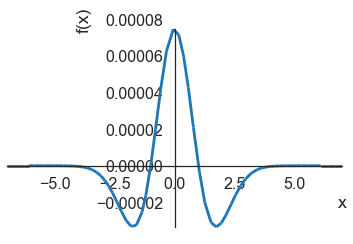

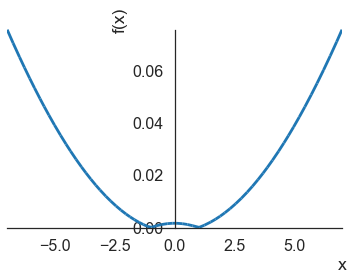

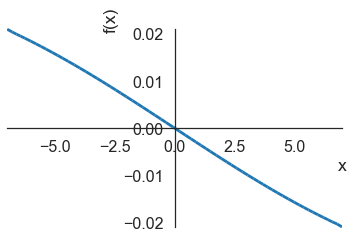

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')
currentDelta = 0.2
plotRange = (x,-7,7)

sp.plot(absolutedifference.subs(delta, currentDelta),plotRange)
sp.plot(abs(relativedifference.subs(delta,currentDelta)),plotRange)
sp.plot(differenceDerivative.subs(delta,currentDelta),plotRange)

### Relative error at different function points over grid spacing

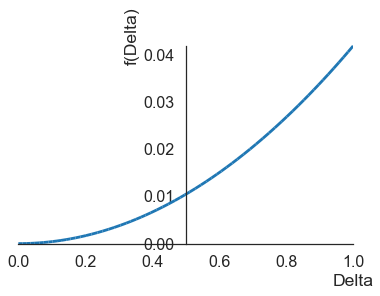

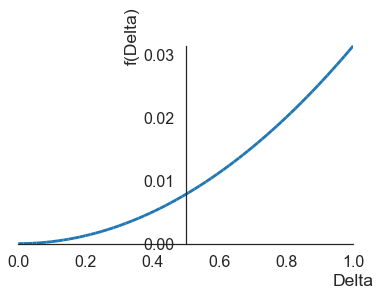

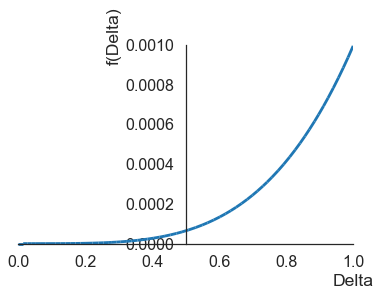

In [36]:
#relative error
spacingRange = (delta,0.0001,1)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,0),spacingRange)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,0.5),spacingRange)
sp.plot(((gauss(x)*delta) /(integrated(x+delta/2) - integrated(x-delta/2))-1).subs(x,1),spacingRange)

## Missing contribution to Gauss integral due to truncation of integration range

Integrate three dimensional Gaussian function in radial coordinates up to $u$
$$
    \int_0^{2 \pi}\int_0^{\pi}\int_0^{u} \cfrac{1}{\sqrt{2 \pi}^3\sigma^3}\exp{\left(-\frac{r^2}{2\sigma^2}\right)}r^2\sin{\theta}\mathrm{d}r\mathrm{d}\theta\mathrm{d}\phi
$$

In [79]:
r,theta,phi,sigma=sp.symbols('r theta phi sigma')
ru=sp.symbols('u')

In [87]:
gaussprefactor = 1/(sp.sqrt(2*sp.pi)**3 * sigma **3)
thetaintegral = 2
phiintegral = 2 * sp.pi
rintegral = sp.integrate(r * r * sp.exp(
    -r * r / (2 * sigma**2)), (r, 0, ru))

result = thetaintegral * phiintegral * gaussprefactor * rintegral

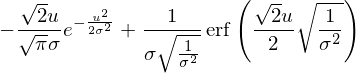

In [88]:
result.simplify()

In [98]:
# express u in multiples of sigma which is effectivly achieved by 
usigma = result.subs(sigma,1).simplify()
# because we have only the term u/sigma in above equation 

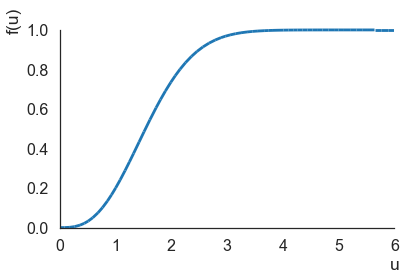

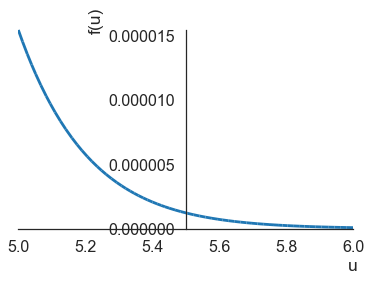

In [103]:
#fraction of total density covered by integration until nSigma
nSigma = 6
sp.plot(usigma, (ru,0,nSigma))

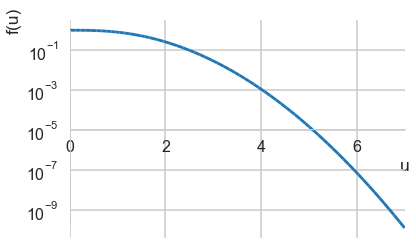

In [113]:
sns.set_style('whitegrid')
sp.plot(1-usigma, (ru,0,7),yscale='log')

In [144]:
print("nSigma\tMissing Part")
for nSigma in range(7):
    print("{:g}\t{:6.2e}".format(nSigma, sp.N(1-usigma.subs(ru,nSigma))))

nSigma	Missing Part
0	1.00e+0
1	8.01e-1
2	2.61e-1
3	2.93e-2
4	1.13e-3
5	1.54e-5
6	7.49e-8
